In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import os

In [2]:
# Create a directory to save visualizations
os.makedirs('visualizations', exist_ok=True)

# Load the data
df = pd.read_csv(r'C:\Users\iamaa\Downloads\dataset_heartdisease\2022\heart_2022_with_nans.csv')

In [3]:
# 1. Data Exploration
print("Data Features:")
print(df.info())

Data Features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer 

In [4]:
print("\nSample data:")
print(df.head())


Sample data:
     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         8.0          Na

In [5]:
print("\nDataset shape:", df.shape)


Dataset shape: (445132, 40)


In [6]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       434205.000000     436065.000000  439679.000000   416480.000000   
mean             4.347919          4.382649       7.022983        1.702691   
std              8.688912          8.387475       1.502425        0.107177   
min              0.000000          0.000000       1.000000        0.910000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          5.000000       8.000000        1.780000   
max             30.000000         30.000000      24.000000        2.410000   

       WeightInKilograms            BMI  
count      403054.000000  396326.000000  
mean           83.074470      28.529842  
std            21.448173       6.554889  
min            22.680000      12.020000  
25%            68.040000      24.130000  
50%            80.740000

In [7]:
print("\nMissing values:")
missing_values = df.isnull().sum()
print(missing_values)


Missing values:
State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
Rac

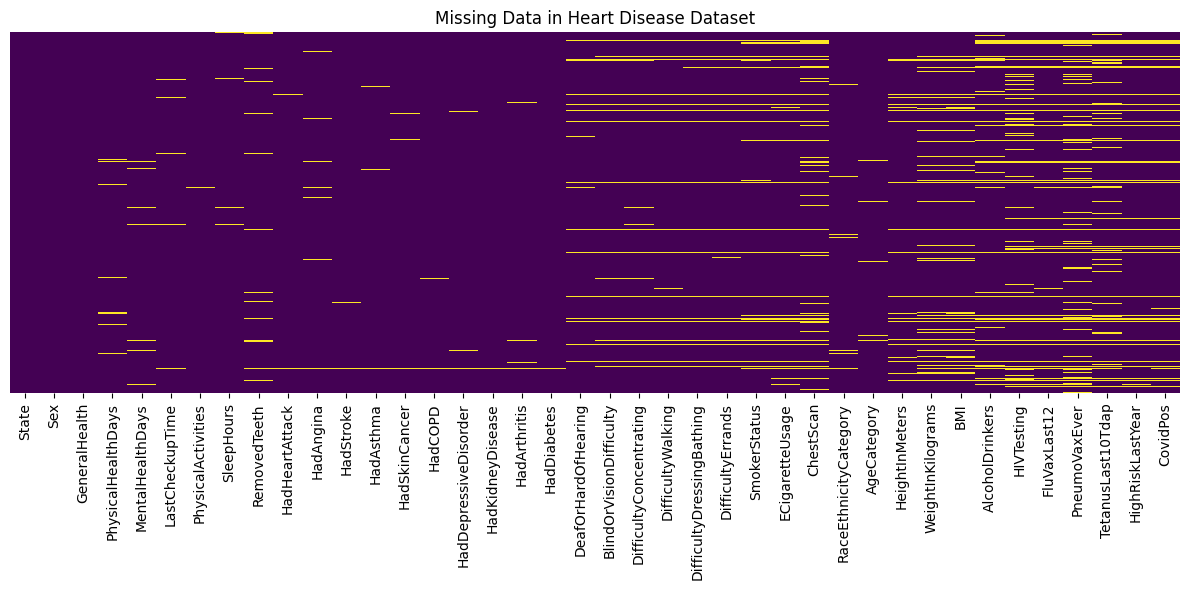

In [8]:
# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data in Heart Disease Dataset')
plt.tight_layout()
plt.savefig('visualizations/missing_data_heatmap.png')
plt.show()
plt.close()

In [9]:
# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values:")
print(missing_percentage)


Percentage of missing values:
State                         0.000000
Sex                           0.000000
GeneralHealth                 0.269134
PhysicalHealthDays            2.454777
MentalHealthDays              2.036924
LastCheckupTime               1.866413
PhysicalActivities            0.245545
SleepHours                    1.225030
RemovedTeeth                  2.552052
HadHeartAttack                0.688560
HadAngina                     0.989594
HadStroke                     0.349784
HadAsthma                     0.398309
HadSkinCancer                 0.706083
HadCOPD                       0.498504
HadDepressiveDisorder         0.631723
HadKidneyDisease              0.432681
HadArthritis                  0.591510
HadDiabetes                   0.244197
DeafOrHardOfHearing           4.638399
BlindOrVisionDifficulty       4.844406
DifficultyConcentrating       5.445576
DifficultyWalking             5.394355
DifficultyDressingBathing     5.372564
DifficultyErrands             5.7

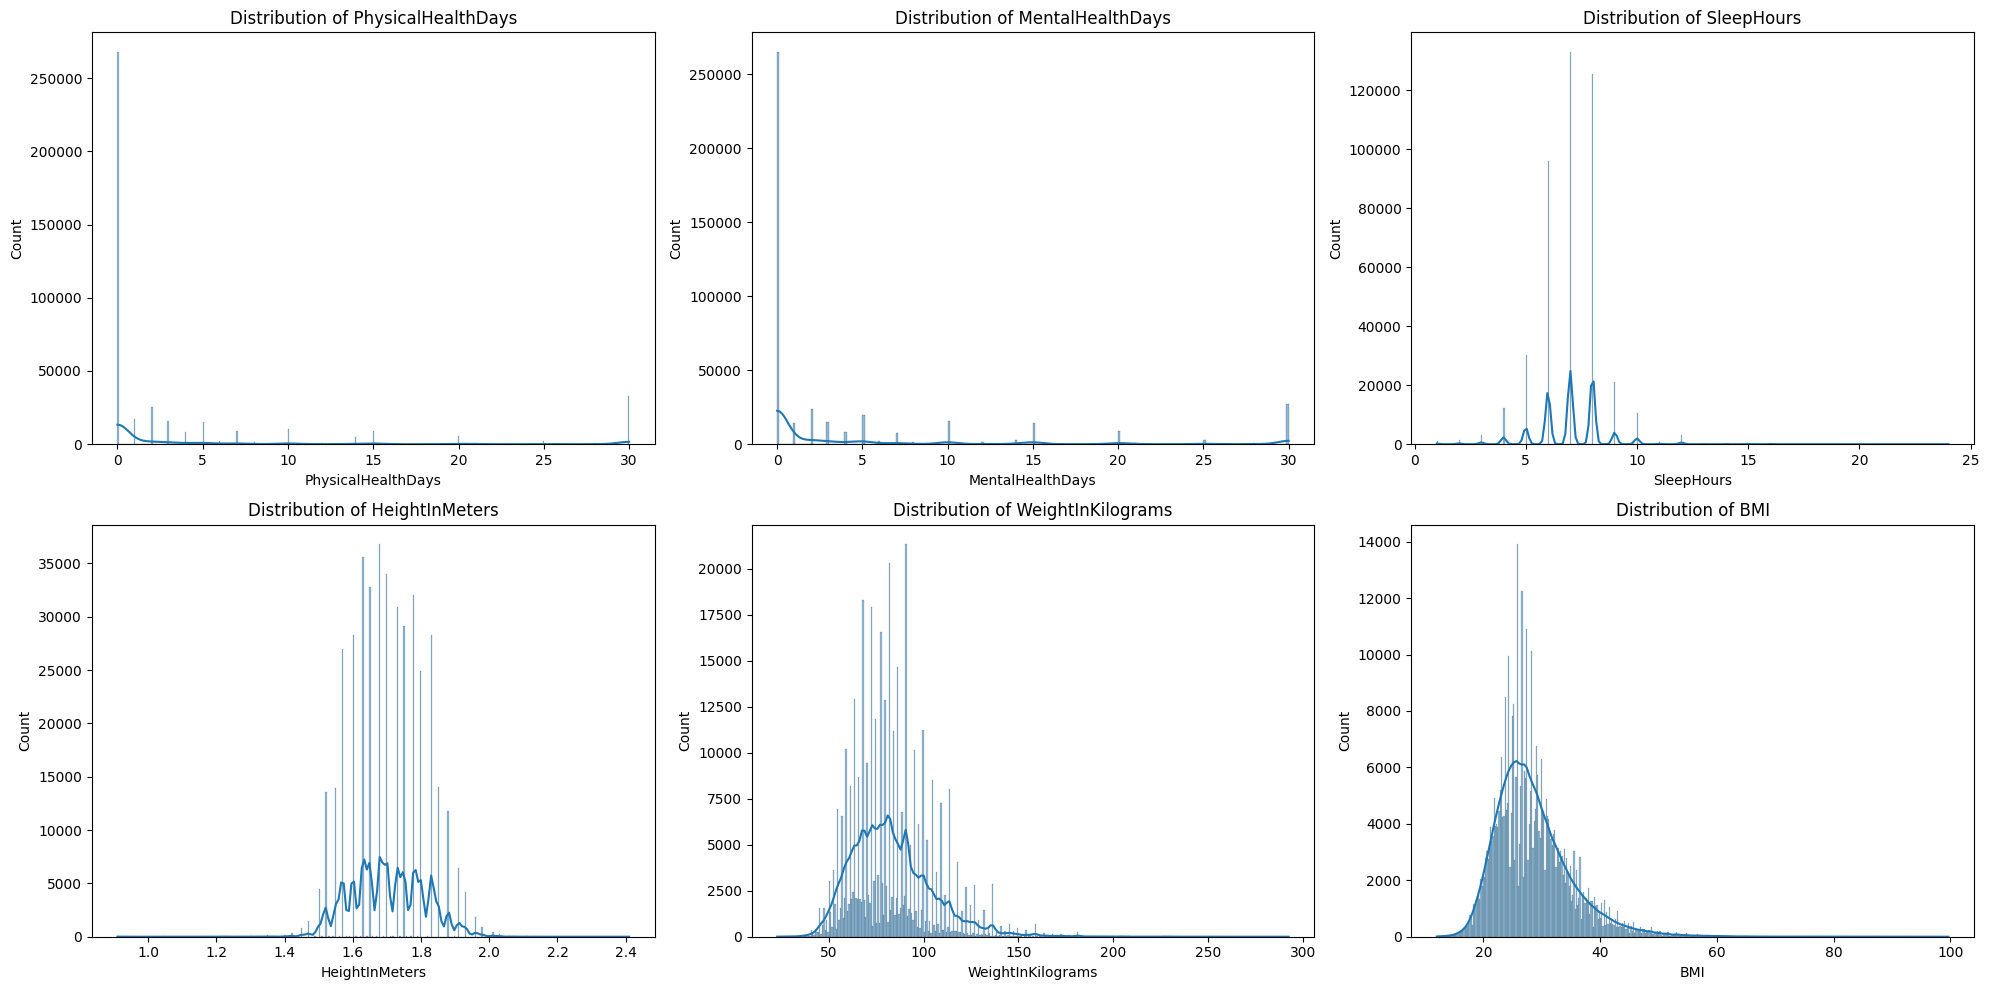

In [10]:
# Visualize distribution of numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=(len(numeric_features)+1)//3, ncols=3, figsize=(20, 5*((len(numeric_features)+1)//3)))
for i, feature in enumerate(numeric_features):
    sns.histplot(df[feature].dropna(), kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.savefig('visualizations/numeric_features_distribution.png')
plt.show()
plt.close()

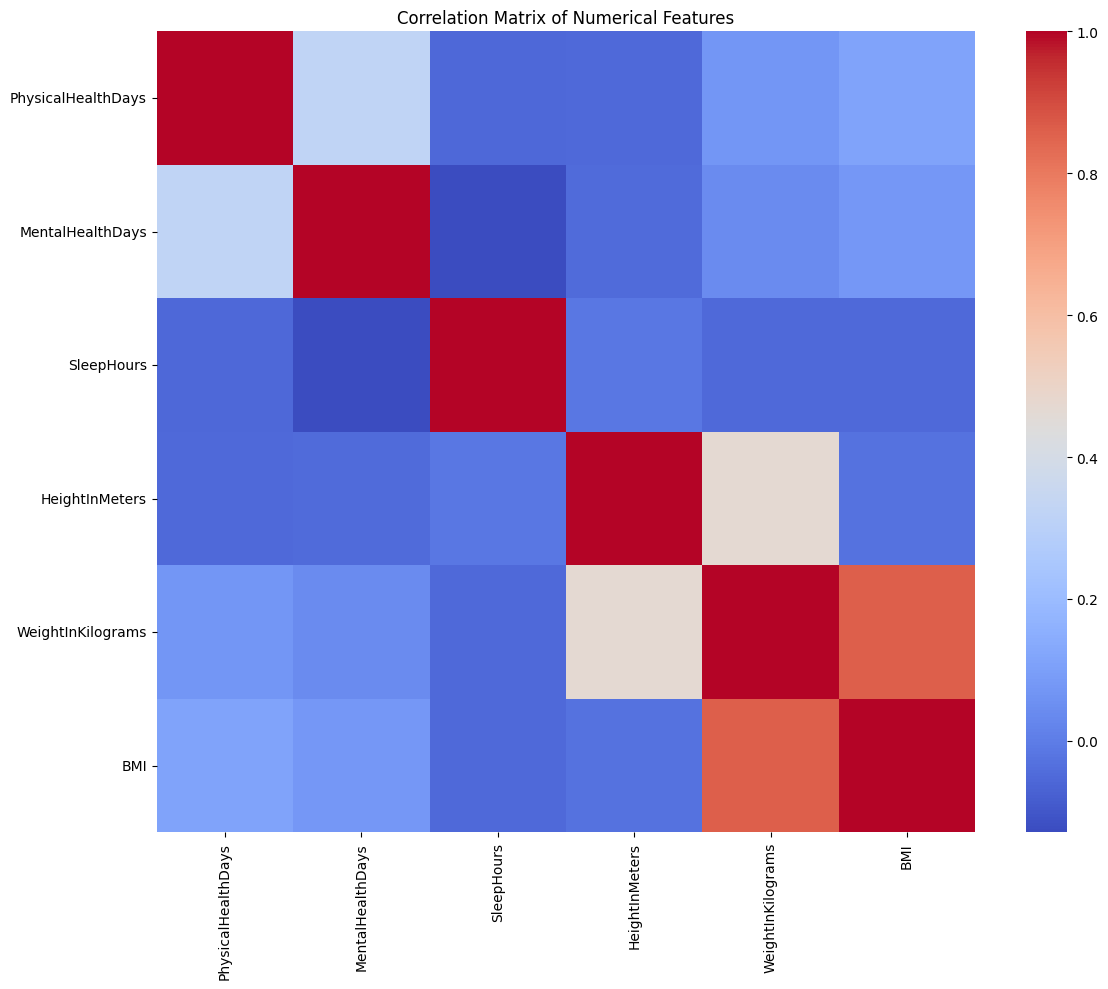

In [11]:
# Correlation matrix of numerical features
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.savefig('visualizations/correlation_matrix.png')
plt.show()
plt.close()


In [12]:
# 2. Data Preprocessing
# Separate features and target variable
X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']

categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Try to create OneHotEncoder with sparse=False, if it fails, create without this parameter
try:
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])
except TypeError:
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor and transform the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Get feature names
try:
    feature_names = (numeric_features.tolist() + 
                     preprocessor.named_transformers_['cat']
                     .named_steps['onehot']
                     .get_feature_names_out(categorical_features).tolist())
except AttributeError:
    # For older versions of scikit-learn
    feature_names = (numeric_features.tolist() + 
                     preprocessor.named_transformers_['cat']
                     .named_steps['onehot']
                     .get_feature_names(categorical_features).tolist())

# Convert to dense array if sparse
if hasattr(X_train_preprocessed, 'toarray'):
    X_train_preprocessed = X_train_preprocessed.toarray()
if hasattr(X_test_preprocessed, 'toarray'):
    X_test_preprocessed = X_test_preprocessed.toarray()

# Create DataFrames with preprocessed data
df_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=feature_names)
df_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=feature_names)

print("\nPreprocessed training data shape:", df_train_preprocessed.shape)
print("Preprocessed test data shape:", df_test_preprocessed.shape)


Preprocessed training data shape: (356105, 185)
Preprocessed test data shape: (89027, 185)

NaN values in preprocessed training data: 0
NaN values in preprocessed test data: 0


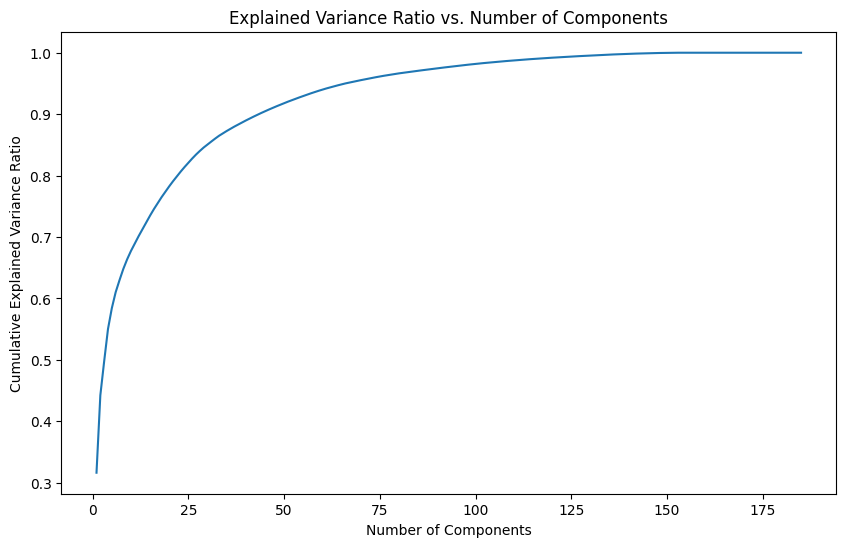

In [13]:
# 3. Dimensionality Reduction with PCA
pca = PCA()
X_train_pca = pca.fit_transform(df_train_preprocessed)
X_test_pca = pca.transform(df_test_preprocessed)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.savefig('visualizations/pca_explained_variance.png')
plt.show()
plt.close()

In [14]:
# Determine number of components for 95% variance
n_components_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"\nNumber of components needed for 95% variance: {n_components_95}")

# Apply PCA with 95% variance
pca_95 = PCA(n_components=n_components_95)
X_pca_95 = pca_95.fit_transform(df_train_preprocessed)

# Create a DataFrame with PCA results
df_pca = pd.DataFrame(X_pca_95, columns=[f'PC{i+1}' for i in range(n_components_95)])

print("\nPCA transformed data shape:", df_pca.shape)
print("\nSample of PCA transformed data:")
print(df_pca.head())


Number of components needed for 95% variance: 66

PCA transformed data shape: (356105, 66)

Sample of PCA transformed data:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.546706 -0.432958 -0.325217 -0.795908 -2.049936  0.689760 -0.077550   
1 -1.708043 -0.309191  0.380429 -0.531938 -0.698947  0.239573  0.649141   
2  7.292456 -4.168645  0.239547 -0.754626  2.385574 -0.573425 -0.106047   
3 -1.906740 -0.362538 -0.544539  0.031366  1.719304 -0.474774 -0.300956   
4 -1.667446 -0.604511 -0.343085 -0.690425 -1.254084  0.044064  0.644975   

        PC8       PC9      PC10  ...      PC57      PC58      PC59      PC60  \
0  0.300578  0.038728 -0.245431  ... -0.336774  0.177081 -0.179671 -0.212973   
1 -1.162077 -0.210923 -1.136511  ... -0.058888 -0.134651 -0.037808  0.039179   
2  0.716532 -0.634088 -0.047411  ...  0.117167 -0.107399 -0.055243 -0.160700   
3  0.019003  0.517641  0.452849  ... -0.060760 -0.103978 -0.070442 -0.444661   
4 -0.220233  0.079971 -0

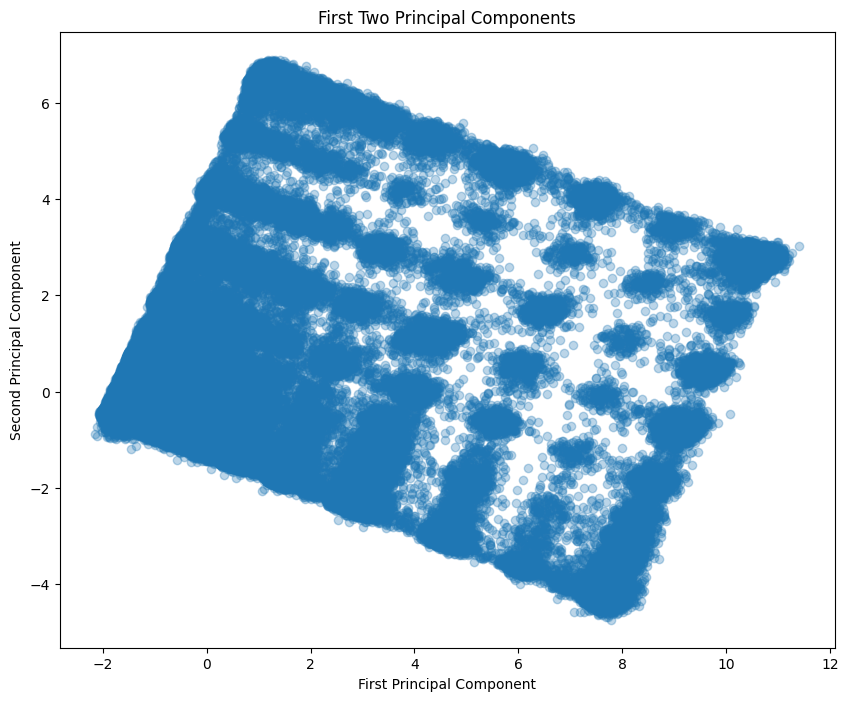

In [15]:
# Visualize first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(X_pca_95[:, 0], X_pca_95[:, 1], alpha=0.3)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('First Two Principal Components')
plt.savefig('visualizations/pca_first_two_components.png')
plt.show()
plt.close()

In [16]:
# 4. Feature Importance based on PCA
components_df = pd.DataFrame(pca_95.components_.T, columns=[f'PC{i+1}' for i in range(n_components_95)], index=feature_names)
components_df['sum'] = components_df.abs().sum(axis=1)
top_features = components_df.sort_values('sum', ascending=False).head(20)

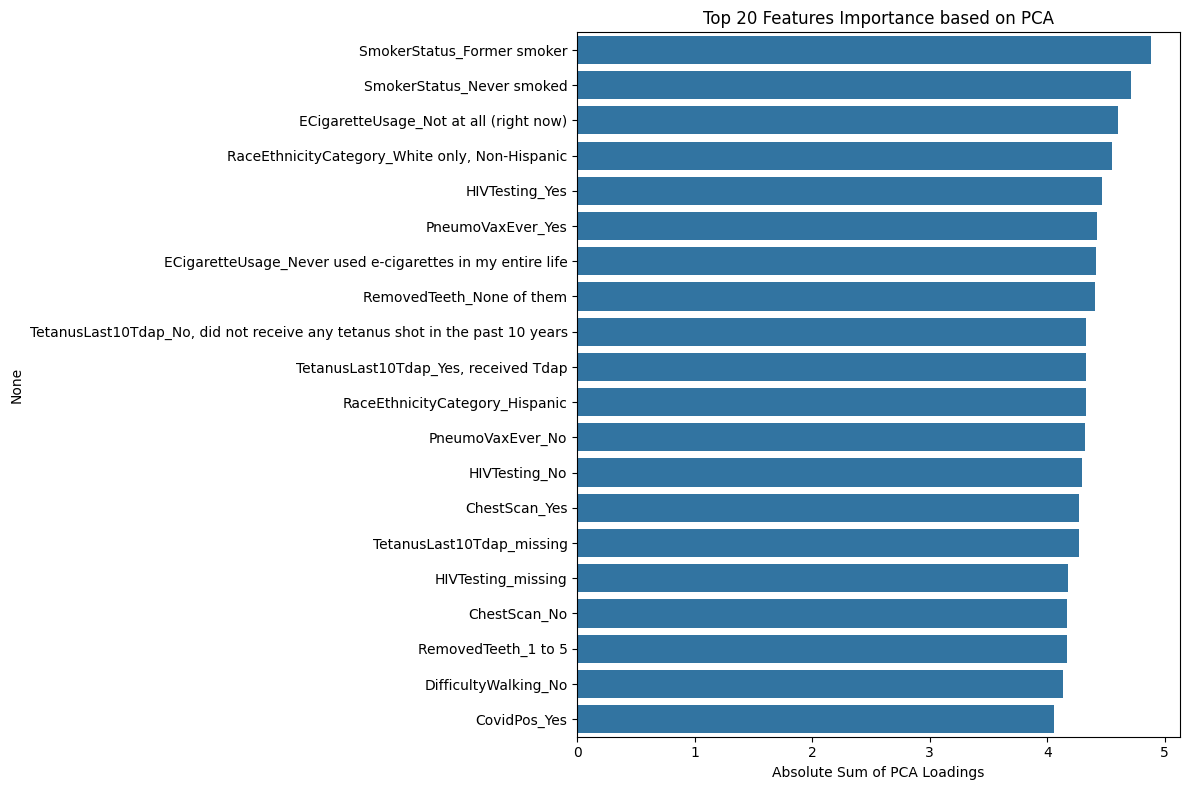

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(x='sum', y=top_features.index, data=top_features)
plt.title('Top 20 Features Importance based on PCA')
plt.xlabel('Absolute Sum of PCA Loadings')
plt.tight_layout()
plt.savefig('visualizations/pca_feature_importance.png')
plt.show()
plt.close()

In [18]:
print("\nTop 20 important features based on PCA:")
print(top_features['sum'])


Top 20 important features based on PCA:
SmokerStatus_Former smoker                                                     4.885690
SmokerStatus_Never smoked                                                      4.709226
ECigaretteUsage_Not at all (right now)                                         4.600249
RaceEthnicityCategory_White only, Non-Hispanic                                 4.550674
HIVTesting_Yes                                                                 4.464704
PneumoVaxEver_Yes                                                              4.426706
ECigaretteUsage_Never used e-cigarettes in my entire life                      4.415696
RemovedTeeth_None of them                                                      4.405012
TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years    4.331009
TetanusLast10Tdap_Yes, received Tdap                                           4.329384
RaceEthnicityCategory_Hispanic                                                 

In [23]:
# 5. Prepare data for modeling
X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use the preprocessor to transform the feature data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [20]:
# 4. Implement Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_preprocessed, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test_preprocessed)
lr_probabilities = lr_model.predict_proba(X_test_preprocessed)[:, 1]

# Evaluate Logistic Regression
print("\nLogistic Regression Results:")
print(classification_report(y_test, lr_predictions))

ValueError: Input contains NaN

In [ ]:
# 5. Implement Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_preprocessed)
rf_probabilities = rf_model.predict_proba(X_test_preprocessed)[:, 1]

# Evaluate Random Forest
print("\nRandom Forest Results:")
print(classification_report(y_test, rf_predictions))

In [ ]:
# 6. Compare ROC curves
plt.figure(figsize=(10, 8))
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probabilities)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probabilities)

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, lr_probabilities):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_probabilities):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.savefig('visualizations/roc_curve_comparison.png')
plt.show()
plt.close()



In [ ]:
# 7. Feature Importance (for Random Forest)
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.savefig('visualizations/rf_feature_importance.png')
plt.show()
plt.close()

In [ ]:
print("\nTop 20 important features based on Random Forest:")
print(feature_importance.head(20))